In [1]:
!pip install bertopic

In [2]:
import pandas as pd
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data["data"]
targets = data["target"]
target_names = data["target_names"]
classes = [data["target_names"][i] for i in data["target"]]

In [17]:
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
classes

['rec.sport.hockey',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.mideast',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'sci.electronics',
 'comp.sys.mac.hardware',
 'rec.sport.hockey',
 'rec.sport.hockey',
 'talk.religion.misc',
 'talk.religion.misc',
 'sci.crypt',
 'talk.religion.misc',
 'sci.med',
 'alt.atheism',
 'talk.politics.mideast',
 'sci.electronics',
 'sci.electronics',
 'sci.crypt',
 'rec.motorcycles',
 'rec.autos',
 'comp.windows.x',
 'comp.graphics',
 'rec.motorcycles',
 'rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'comp.graphics',
 'misc.forsale',
 'alt.atheism',
 'rec.autos',
 'talk.politics.guns',
 'comp.windows.x',
 'rec.sport.baseball',
 'sci.med',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'talk.politics.misc',
 'rec.motorcycles',
 'rec.motorcycles',
 'talk.religion.misc',
 'comp.graphics',
 'sci.electronics',
 'rec.autos',
 'rec.sport.hockey',
 'comp.windows.x',
 'comp.os.ms-windows.misc',
 'misc.forsale',
 'sci.crypt',
 'comp.os.

In [3]:
topic_model = BERTopic(verbose=True)
topics, _ = topic_model.fit_transform(docs)

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-10-02 22:54:10,726 - BERTopic - Transformed documents to Embeddings
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2023-10-02 22:54:22,115 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-10-02 22:54:22,956 - BERTopic - Clustered reduced embeddings


<h1>Saving the model</h1>

In [6]:
embedding_model = "BERTopicModel"
topic_model.save("./BERTopicModel", serialization="pytorch", save_ctfidf=True, save_embedding_model=embedding_model)

In [7]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6859,-1_to_and_the_is,"[to, and, the, is, of, for, in, you, it, that]",[I posted this several days ago for Dave Butle...
1,0,713,0_he_year_game_hit,"[he, year, game, hit, baseball, players, team,...","[\n\tOh, yeah. Dave Winfield--marginal player..."
2,1,599,1_key_clipper_encryption_chip,"[key, clipper, encryption, chip, keys, escrow,...",[The following document summarizes the Clipper...
3,2,526,2_ites_cheek_yep_huh,"[ites, cheek, yep, huh, ken, forget, art, why,...","[\nYep.\n, \n \n ..."
4,3,433,3_card_monitor_video_vga,"[card, monitor, video, vga, drivers, monitors,...",[Hello all.\n\tI am thinking about buying an e...
...,...,...,...,...,...
227,226,11,226_c610_iivx_610_centris,"[c610, iivx, 610, centris, apple, problems, de...","[Well, I just got my Centris 610 yesterday. I..."
228,227,10,227_rape_female_underwear_statutes,"[rape, female, underwear, statutes, clayton, e...",[)\n)\n)>The official and legal term for rape ...
229,228,10,228_colormap_colormaps_color_window,"[colormap, colormaps, color, window, clients, ...","[Dear SGI and netter GL-X Mixed-Model experts,..."
230,229,10,229_carcinogenic_meat_smoke_carcinogens,"[carcinogenic, meat, smoke, carcinogens, wood,...",[\n From THE TUFTS UNIVERSITY GUIDE TO TOTAL...


In [8]:
topic_model.get_topic(224)

[('magi', 0.04259346007770772),
 ('zoroastrians', 0.026482642083216962),
 ('zoroastrian', 0.019896251893297186),
 ('osiris', 0.015766585328415926),
 ('iranian', 0.013208645798872586),
 ('masonry', 0.01270550786290177),
 ('zoroastrianism', 0.012646659551410448),
 ('iran', 0.011181299715416352),
 ('nimrod', 0.010958097816025325),
 ('priesthood', 0.010669429722096543)]

20it [00:02,  8.40it/s]


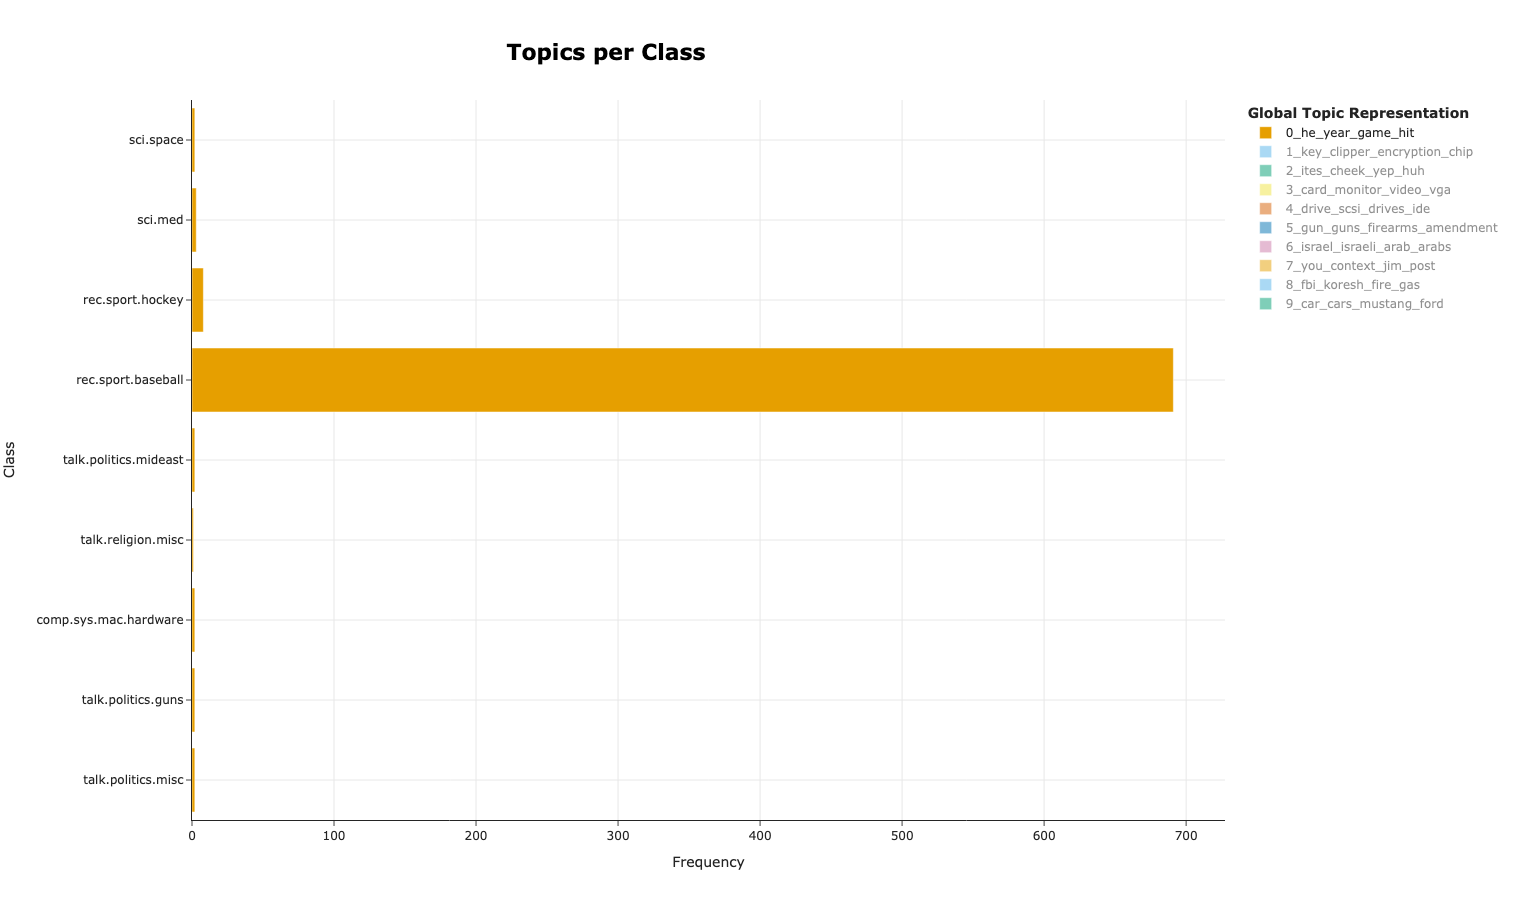

In [28]:
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
fig_unsupervised = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)
fig_unsupervised

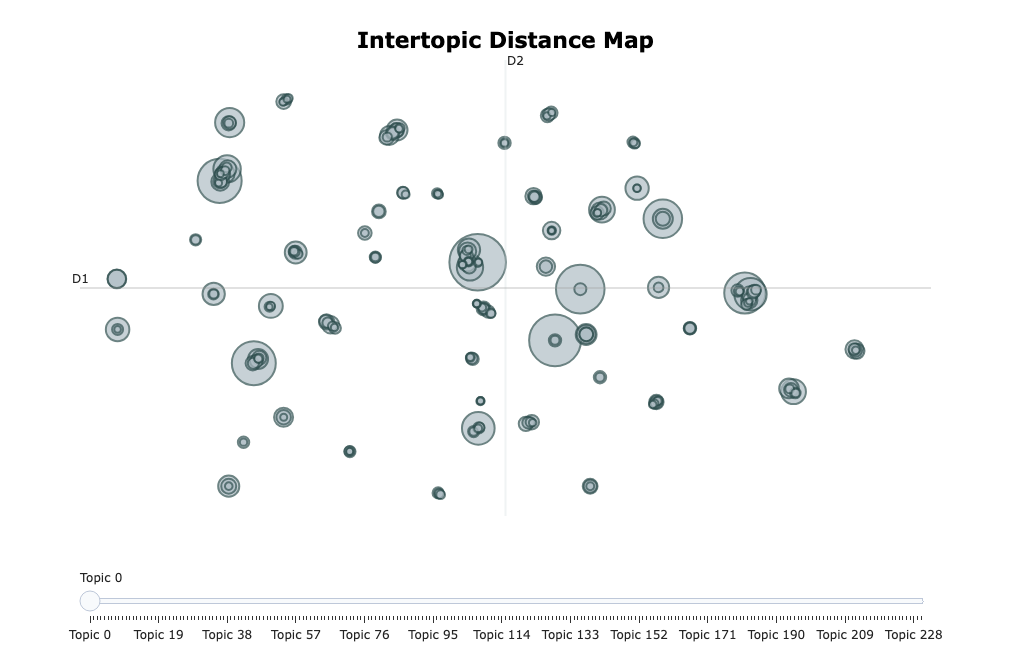

In [11]:
topic_model.visualize_topics()

In [12]:
hierarchical_topics = topic_model.hierarchical_topics(docs)

100%|████████████████████████████████████████| 230/230 [00:00<00:00, 301.58it/s]


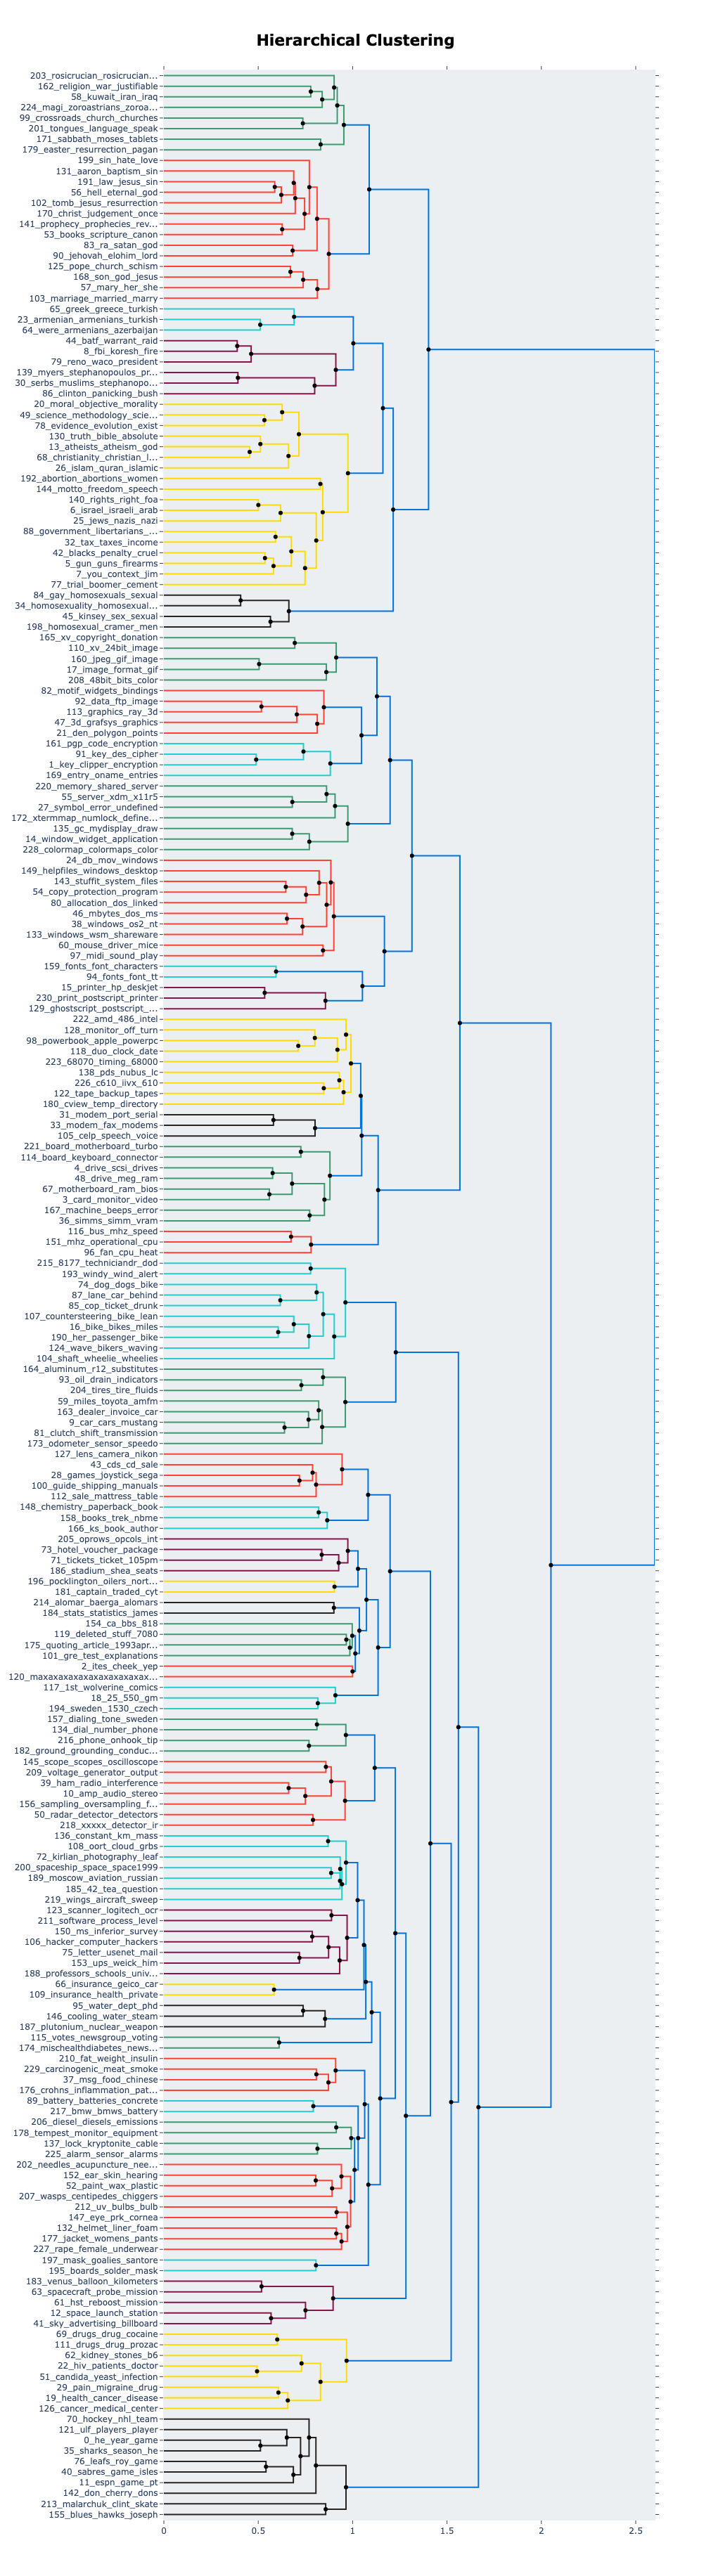

In [14]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)